In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("E:\\Data Science\\8.Machine Learning Algorithms\\2.Classification\\penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.shape

(344, 7)

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape

(334, 7)

In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
df.describe(include="all")

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,334,334,334.000000,334.000000,334.000000,334.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,146,164,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.994311,17.160479,201.014970,4209.056886,NaN
std,NaN,NaN,5.460521,1.967909,14.022175,804.836129,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.575000,18.700000,213.000000,4793.750000,NaN


In [11]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [14]:
df = df[df['sex']!='.']

In [15]:
df.shape

(333, 7)

In [39]:
df.nunique()

species                3
island                 3
culmen_length_mm     163
culmen_depth_mm       79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

Number of Male: 168
Number of Female: 165


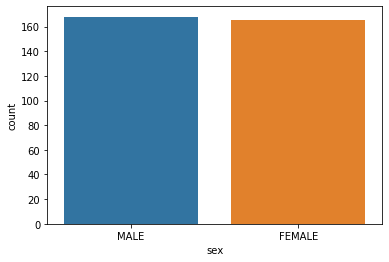

In [16]:
sns.countplot(data = df,x = "sex")
Male,Female = df["sex"].value_counts()
print("Number of Male:",Male)
print("Number of Female:",Female)
plt.show()

In [17]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

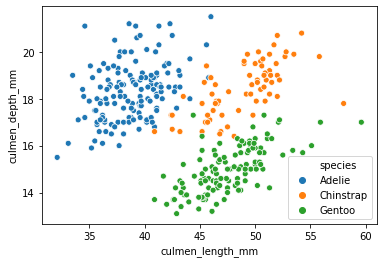

In [18]:
sns.scatterplot(x="culmen_length_mm",y="culmen_depth_mm",data = df, hue= "species")
plt.show()

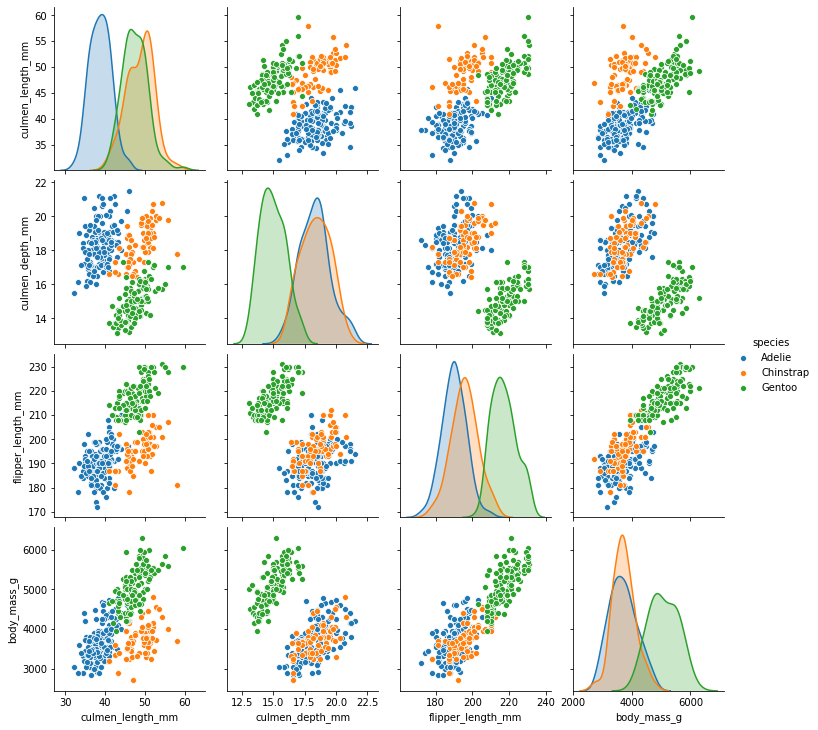

In [19]:
sns.pairplot(data=df,hue="species")
plt.show()

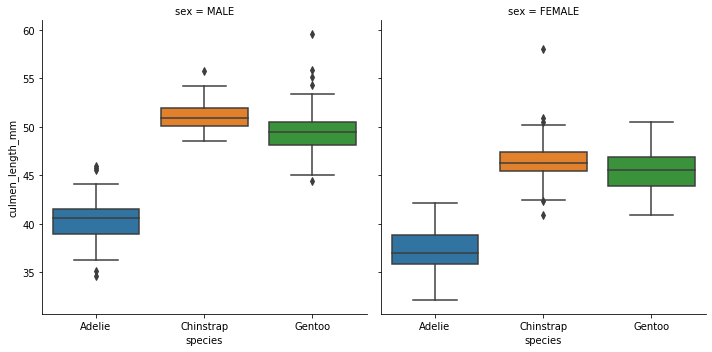

In [20]:
sns.catplot(data=df,x="species",y="culmen_length_mm",kind="box",col = "sex")
plt.show()

In [21]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [22]:
X = pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y = df["species"]

In [23]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


In [24]:
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
base_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print("Accuracy Score:",accuracy_score(y_test,base_pred))

Accuracy Score: 0.9552238805970149


In [32]:
print("Confusion Matrix\n",confusion_matrix(y_test,base_pred))

Confusion Matrix
 [[30  1  0]
 [ 1 15  0]
 [ 1  0 19]]


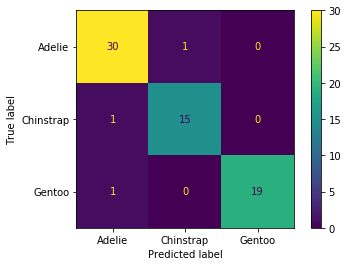

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [37]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.94      0.97      0.95        31
   Chinstrap       0.94      0.94      0.94        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.96      0.96      0.96        67



In [40]:
model.feature_importances_

array([0.35128085, 0.07088022, 0.54456291, 0.        , 0.03327601,
       0.        , 0.        ])

In [41]:
pd.DataFrame(index= X.columns, data=model.feature_importances_,columns=["Feature Importaces"])

,Feature Importaces
culmen_length_mm,0.351281
culmen_depth_mm,0.070880
flipper_length_mm,0.544563
body_mass_g,0.000000
island_Dream,0.033276
island_Torgersen,0.000000
sex_MALE,0.000000


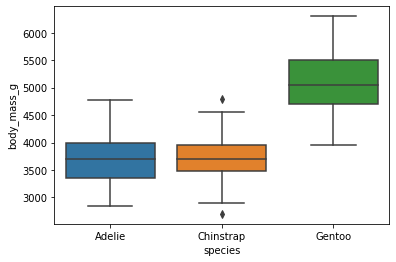

In [43]:
sns.boxplot(x="species",y='body_mass_g',data=df)
plt.show()

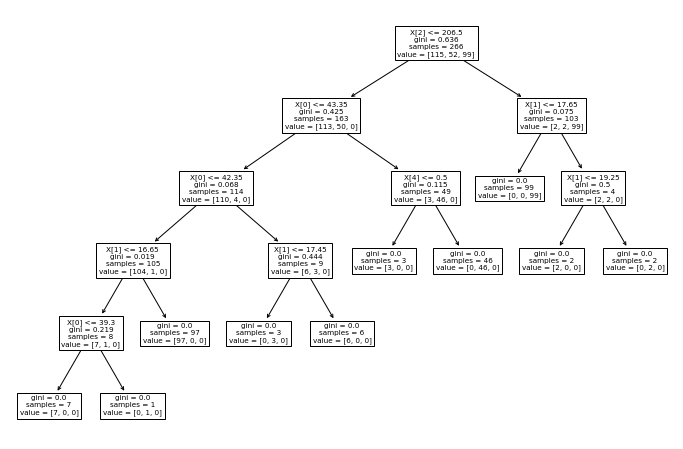

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model)
plt.show()

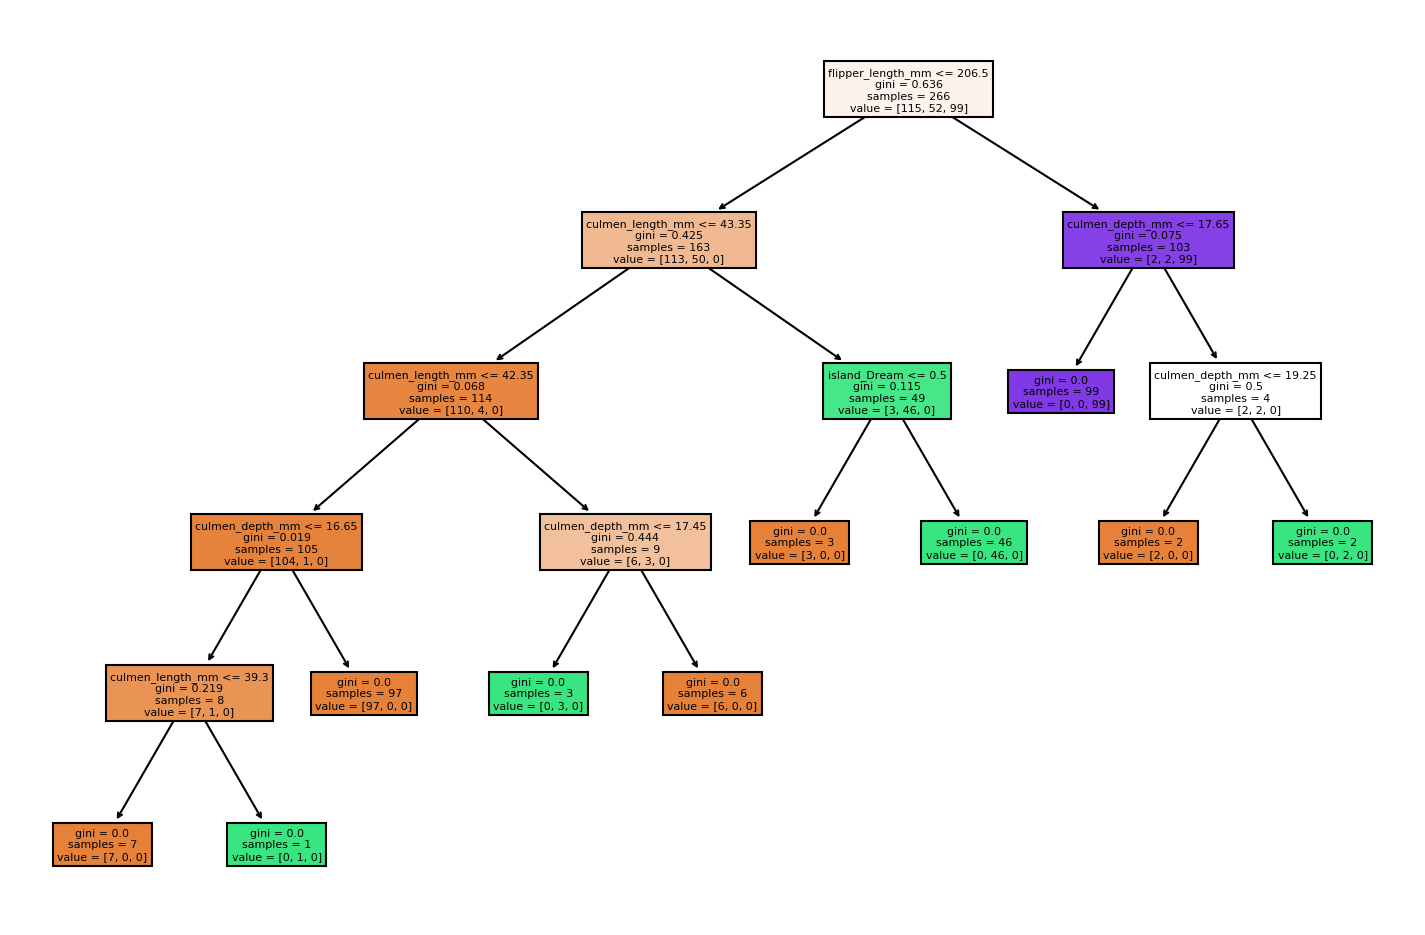

In [48]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns)
plt.show()

In [51]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names = X.columns)

In [52]:
#Understanding Hyperparameters in DT

In [57]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.88      0.97      0.92        31
   Chinstrap       0.86      0.75      0.80        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.91        67
   macro avg       0.91      0.89      0.90        67
weighted avg       0.91      0.91      0.91        67





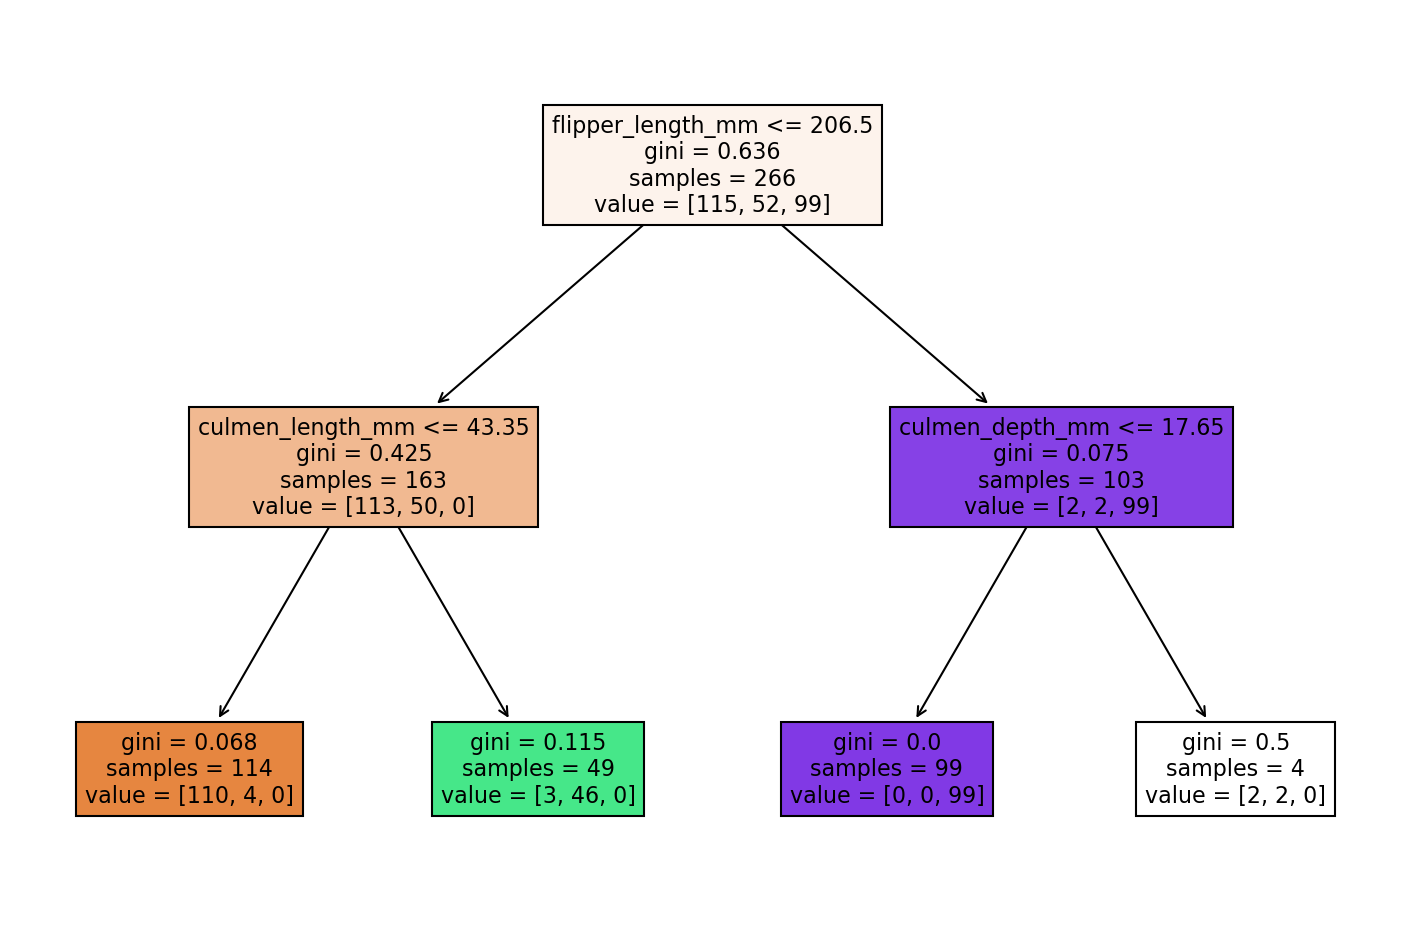

In [58]:
report_model(pruned_tree)

In [59]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        31
   Chinstrap       0.86      0.75      0.80        16
      Gentoo       0.86      0.95      0.90        20

    accuracy                           0.91        67
   macro avg       0.90      0.89      0.89        67
weighted avg       0.91      0.91      0.91        67





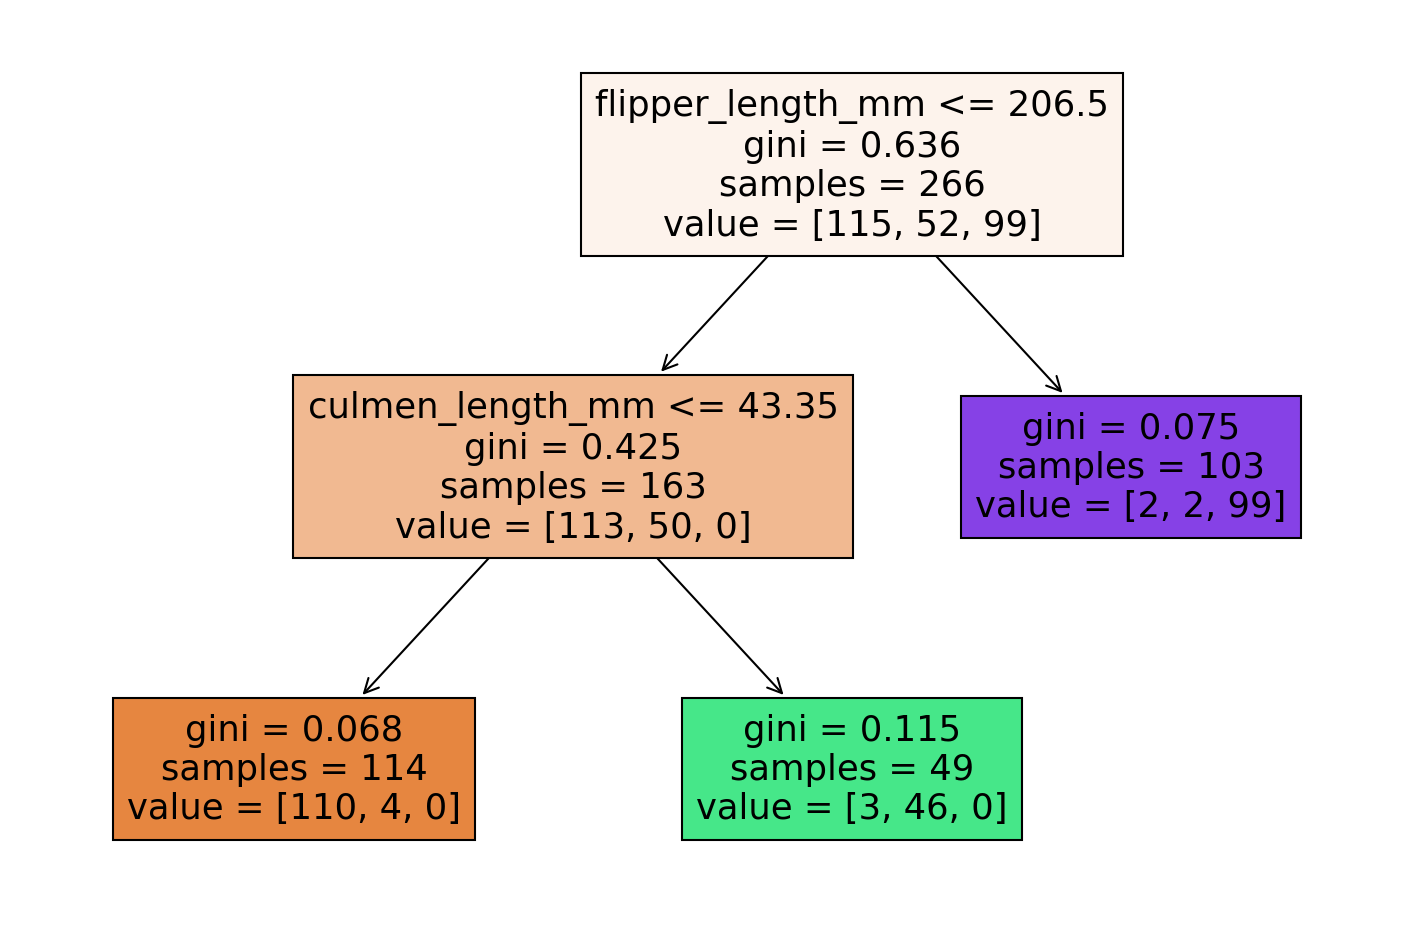

In [60]:
report_model(pruned_tree)

In [62]:
entropy_tree = DecisionTreeClassifier(criterion = "entropy")
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
DecisionTreeClassifier(criterion = "entropy")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

      Adelie       0.97      0.97      0.97        31
   Chinstrap       0.94      1.00      0.97        16
      Gentoo       1.00      0.95      0.97        20

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67





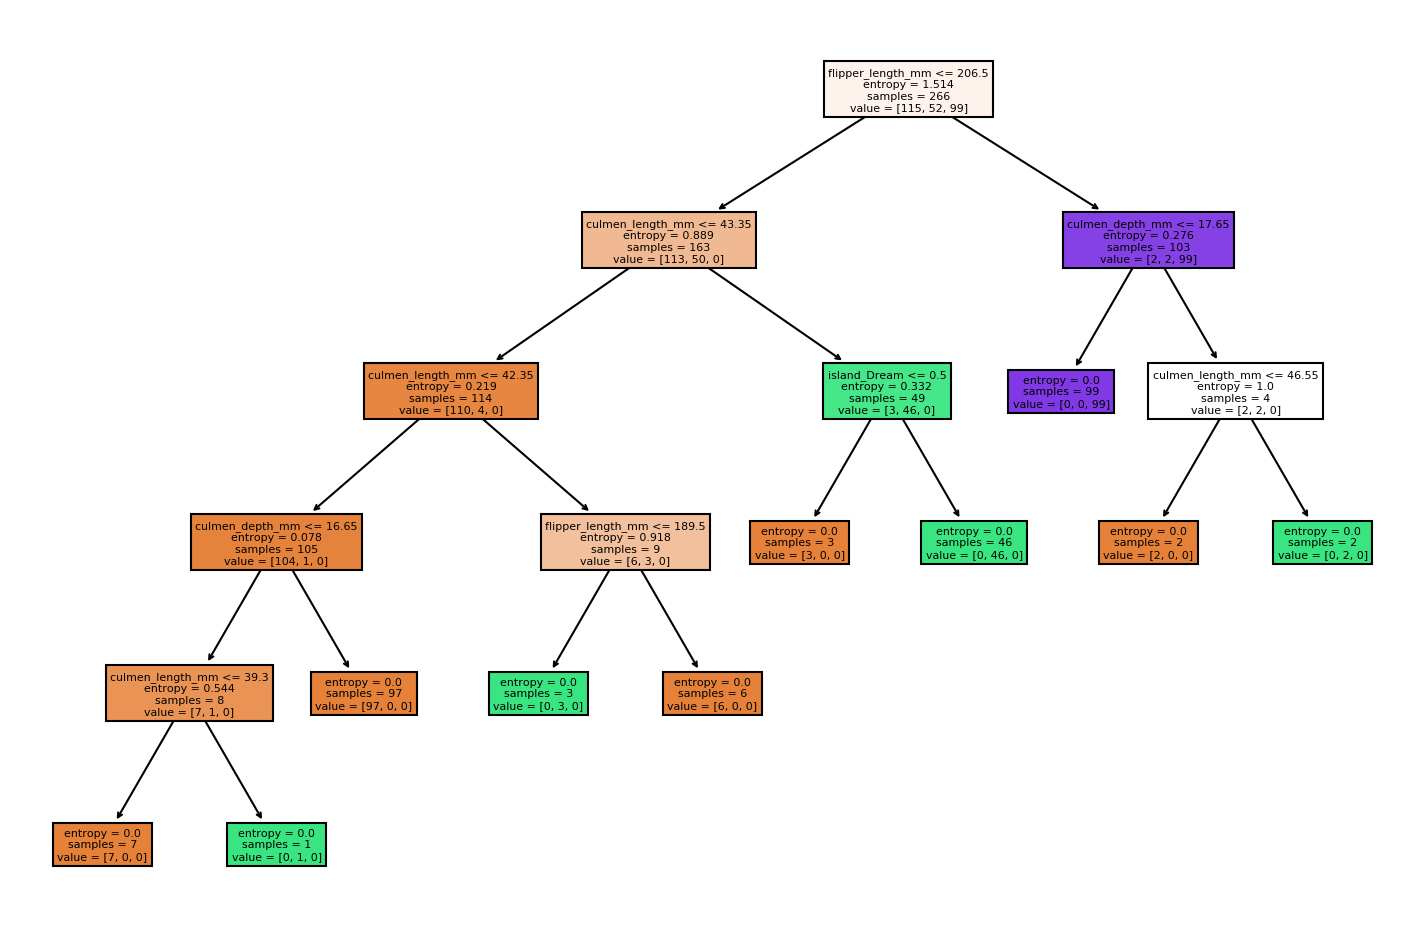

In [65]:
report_model(entropy_tree)